Zinc (Zinc is not commercial) Data Exploration

* https://en.wikipedia.org/wiki/ZINC_database
* http://zinc15.docking.org/
* https://github.com/wengong-jin/icml18-jtnn/tree/master/data/zinc

In [ ]:
# Fortunately, Wengong Jin already has some zinc data prepared in a git repository
!git clone https://github.com/wengong-jin/icml18-jtnn

Cloning into 'icml18-jtnn'...
remote: Enumerating objects: 546, done.
remote: Total 546 (delta 0), reused 0 (delta 0), pack-reused 546
Receiving objects: 100% (546/546), 212.84 MiB | 20.26 MiB/s, done.
Resolving deltas: 100% (217/217), done.
Checking out files: 100% (201/201), done.


In [ ]:
DATA_PATH = "/content/icml18-jtnn/data/zinc/"

def read_data(filename):
  f = open(DATA_PATH+filename, "r")
  lines = f.readlines()
  return [line.strip() for line in lines]

vocab_smiles = read_data("vocab.txt")
train_smiles = read_data("train.txt")

print(len(vocab_smiles))
print(len(train_smiles))

780
220011


In [ ]:
print(vocab_smiles[0:5])
for i in range(5):
  print(train_smiles[i])

['C1=[NH+]C=[NH+]CC1', 'C1=CCCCCC=CCC1', 'C1CCN[NH2+]CC1', 'C1CNCCCNC1', 'C1CCSNC1']
CCCCCCC1=NN2C(=N)/C(=C\c3cc(C)n(-c4ccc(C)cc4C)c3C)C(=O)N=C2S1
COCC[C@@H](C)C(=O)N(C)Cc1ccc(O)cc1
C=CCn1c(S[C@H](C)c2nc3sc(C)c(C)c3c(=O)[nH]2)nnc1C1CC1
C[NH+](C/C=C/c1ccco1)CCC(F)(F)F
COc1ccc(N2C(=O)C(=O)N(CN3CCC(c4nc5ccccc5s4)CC3)C2=O)cc1


In [ ]:
# POTENTIAL FEATURES TO EXPLORE

import matplotlib.pyplot as plt
from statistics import median, mean
%matplotlib inline

def print_metrics(data, bins, title):
  print(title)
  print('min:', min(data), 'max:', max(data), 'median:', median(data), 'average:', mean(data))
  plt.hist(data, bins)
  plt.show()
  print()

Vocabulary Smiles Lengths
min: 1 max: 40 median: 10.5 average: 11.284615384615385


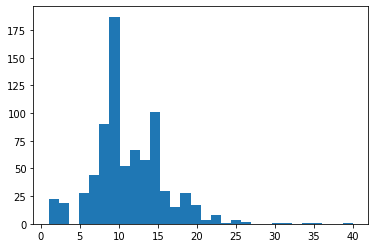


Training Data Lengths
min: 9 max: 120 median: 44 average: 44.32174754898619


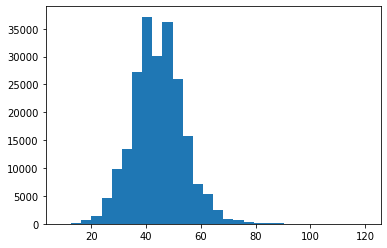

In [ ]:
# Plot LENGTHS OF SMILES STRINGS
len_vocab = [len(smile) for smile in vocab_smiles]
print_metrics(len_vocab, 30, 'Vocabulary Smiles Lengths')

len_train = [len(smile) for smile in train_smiles]
print_metrics(len_train, 30, 'Training Data Lengths')

Branches in the Vocabulary
min: 0 max: 2 median: 0.0 average: 0.1064102564102564


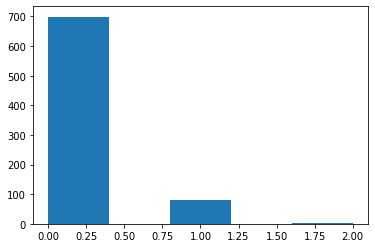


Branches in the Training Data
min: 0 max: 13 median: 4 average: 3.8612523919258583


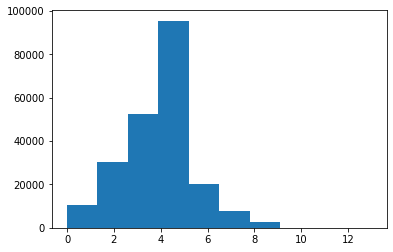

In [ ]:
# Plot # OF BRANCHES
branches_vocab = [smile.count('(') for smile in vocab_smiles]
print_metrics(branches_vocab, 5, 'Branches in the Vocabulary') 

branches_train = [smile.count('(') for smile in train_smiles]
print_metrics(branches_train, 10, 'Branches in the Training Data')

Cycles in the Vocabulary
min: 0 max: 5 median: 1.0 average: 1.2807692307692307


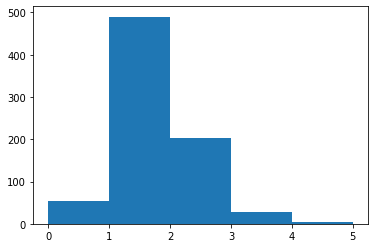


Cycles in the Training Data
min: 0 max: 8 median: 2 average: 2.189176904791124


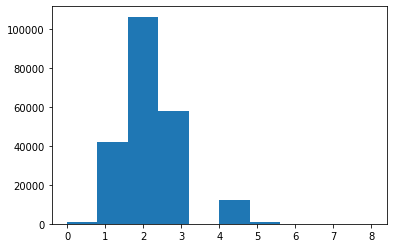

In [ ]:
# Plot # OF CYCLES
def max_num(s):
  max = 0
  for c in s:
    if c.isdigit():
      c = int(c)
      if c > max:
        max = c
  return max

cycles_vocab = [max_num(smile) for smile in vocab_smiles]
print_metrics(cycles_vocab, 5, 'Cycles in the Vocabulary')

cycles_train = [max_num(smile) for smile in train_smiles]
print_metrics(cycles_train, 10, 'Cycles in the Training Data')

In [ ]:
# ATTEMPT TO TRAIN THE VAE FROM WENGONG'S REPOSITORY
%cd /content/icml18-jtnn/fast_molvae
!python preprocess.py --train ../data/zinc/train.txt --split 100 --jobs 16
!mkdir zinc_processed
!mv tensor* zinc_processed
# THIS ISN'T WORKING IN THIS ENVIRONMENT SO MAYBE WE CAN TRY LOCALLY 
# THERE DOES APPEAR TO BE A PRETRAINED MODEL UPLOADED IN THE REPO AS WELL

/content/icml18-jtnn/fast_molvae
Traceback (most recent call last):
  File "preprocess.py", line 7, in <module>
    import cPickle as pickle
ModuleNotFoundError: No module named 'cPickle'
mkdir: cannot create directory ‘zinc_processed’: File exists
mv: cannot stat 'tensor*': No such file or directory


In [ ]:
# Install RDKIT. Takes 2-3 minutes
%%capture
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge python=3.7
!time conda install -q -y -c conda-forge rdkit=2020.09.02

# SETUP RDKIT TO USE
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs

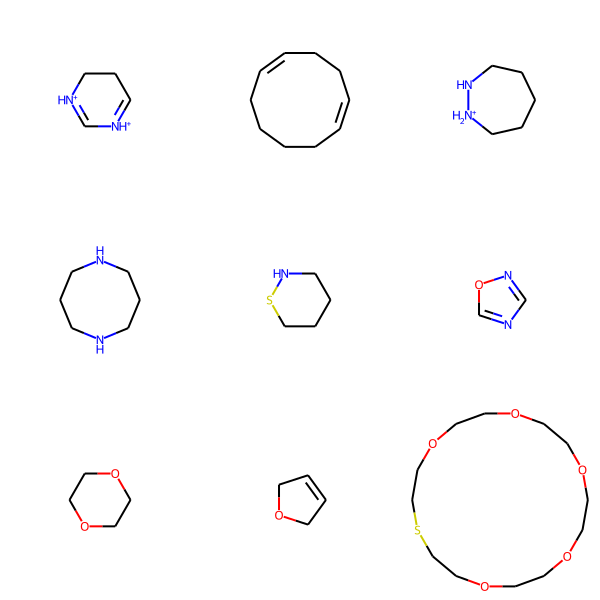

In [ ]:
import rdkit

def get_mol(smiles):
    mol = rdkit.Chem.MolFromSmiles(smiles)
    if mol is None: 
        return None
    rdkit.Chem.Kekulize(mol)
    return mol

mols_vocab = [get_mol(smile) for smile in vocab_smiles]
graph = Draw.MolsToGridImage(mols_vocab[0:9], molsPerRow=3)
graph

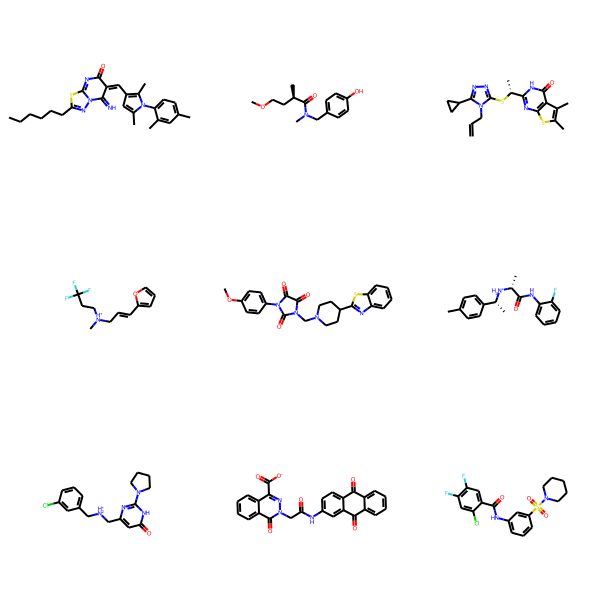

In [ ]:
mols_train = [get_mol(smile) for smile in train_smiles]
graph = Draw.MolsToGridImage(mols_train[0:9], molsPerRow=3)
graph

Number of Atoms in the Vocabulary
min: 1 max: 26 median: 6.0 average: 6.292307692307692


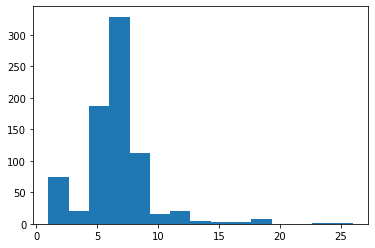


Number of Atoms in the Training Data
min: 6 max: 38 median: 23 average: 23.154851348341673


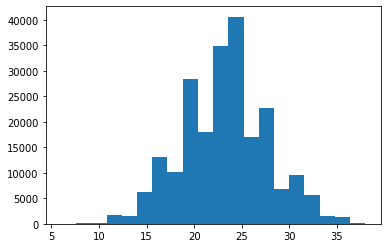

In [ ]:
# GRAPH THE # OF ATOMS
num_atoms_vocab = [mol.GetNumAtoms() for mol in mols_vocab]
print_metrics(num_atoms_vocab, 15, 'Number of Atoms in the Vocabulary')

num_atoms_train = [mol.GetNumAtoms() for mol in mols_train]
print_metrics(num_atoms_train, 20, 'Number of Atoms in the Training Data')

In [ ]:
# SOME IDEAS FOR MORE THINGS TO ADD:

# 1. BREAK DOWN THE GRAPHS INTO JUNCTION TREES
# 2. GRAPH # OF CLUSTERS IN JUNCTION TREES
# 3. LOOK AT USAGE OF EACH ITEM FROM THE VOCAB
# 

chemical_vae  sample_data
